# Three different ways to model gene duplications

In [1]:
from ADG_Complete import *
from IPython.display import Image, display

## Introduction

The general question is the following: Given a present day sample of individuals with different number of gene copies. What is the genealogy of the different genes? How many gene duplications occured? What is the gene duplication rate? What kind of gene copy evolution do we expect under neutrality?

For example: Consider three individuals with (3,2,2) copies. These copies could for example originate from either 4 independent recent duplication events, or one ancient and one recent duplication event.


We present three different ways of modeling the evolution of gene duplication:

- Modeling duplication as mutation process
- Structured Coalescence
- Random Walk on Graph

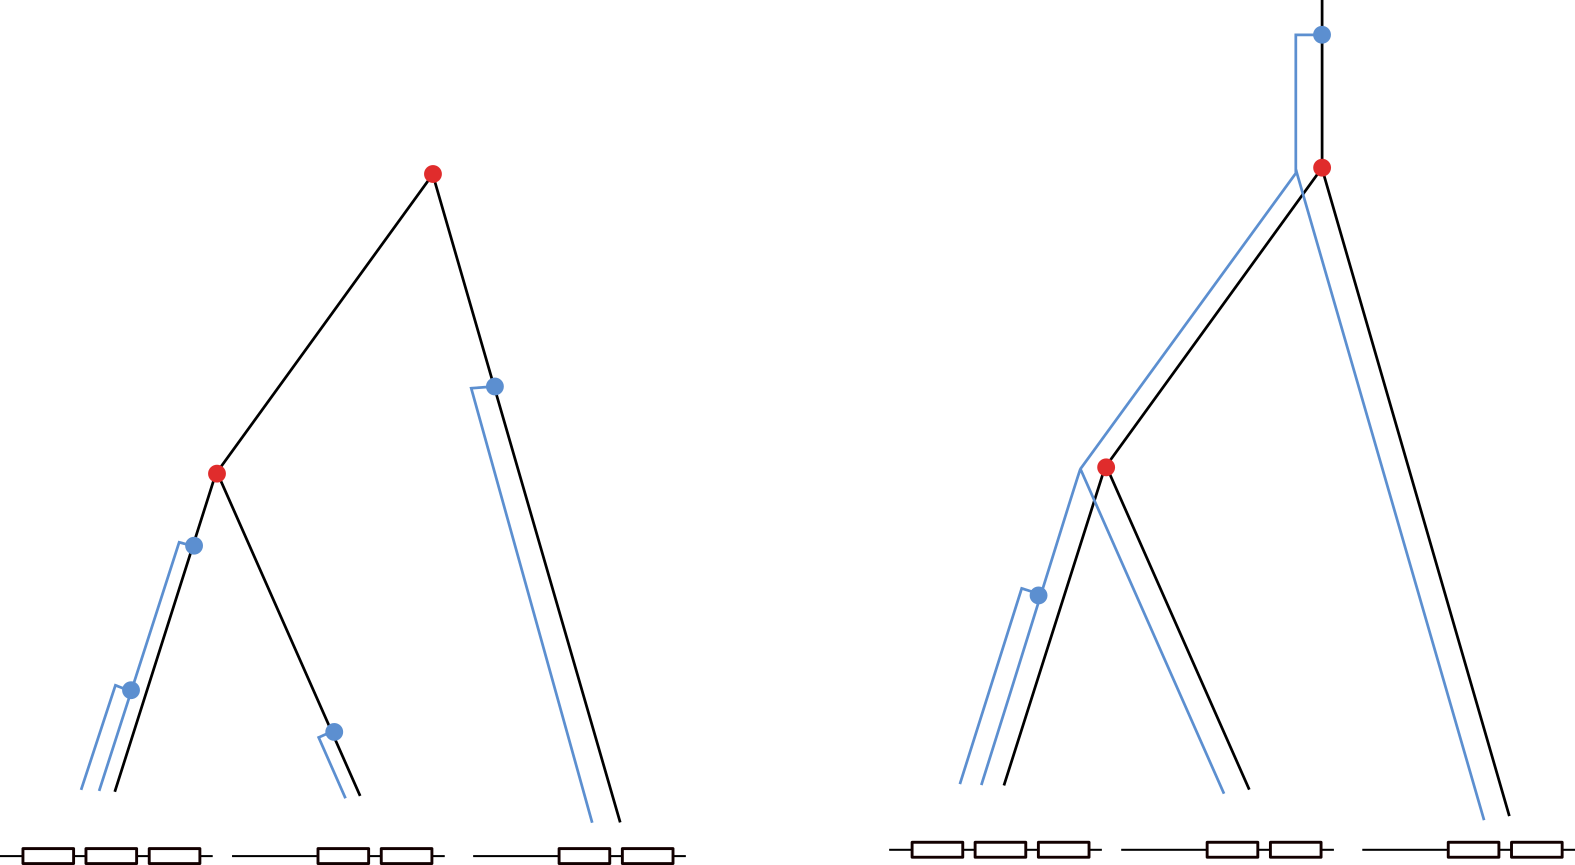

In [2]:
display(Image("ADG_Tree.png", width=800))

In [3]:
n = 3
N = 10000
d = 0.0001
mu = 0.0005

pop = [2,2,3]

alpha = np.zeros(max(pop),dtype=int)
for ind in pop:
    alpha[ind - 1] += 1
alpha = list(alpha)

## 1 Modeling duplications as mutation process

Forward + backward approach.

- We start with a standard coalescence tree (backward approach) of a sample of $n$ with constant population size $N$
- Then, we place duplication events on the tree with rate $d$ as in the standard mutation process and duplicate the subtree. Note, that since also the already duplicated lineages can duplicate again, the number of duplication events along an individual-branch is not Poisson distributed, but negative binomial distributed, as in the standard Yule birth process
- Last, we place mutations with rate $\mu$ on the whole tree and generate the genotype matrix

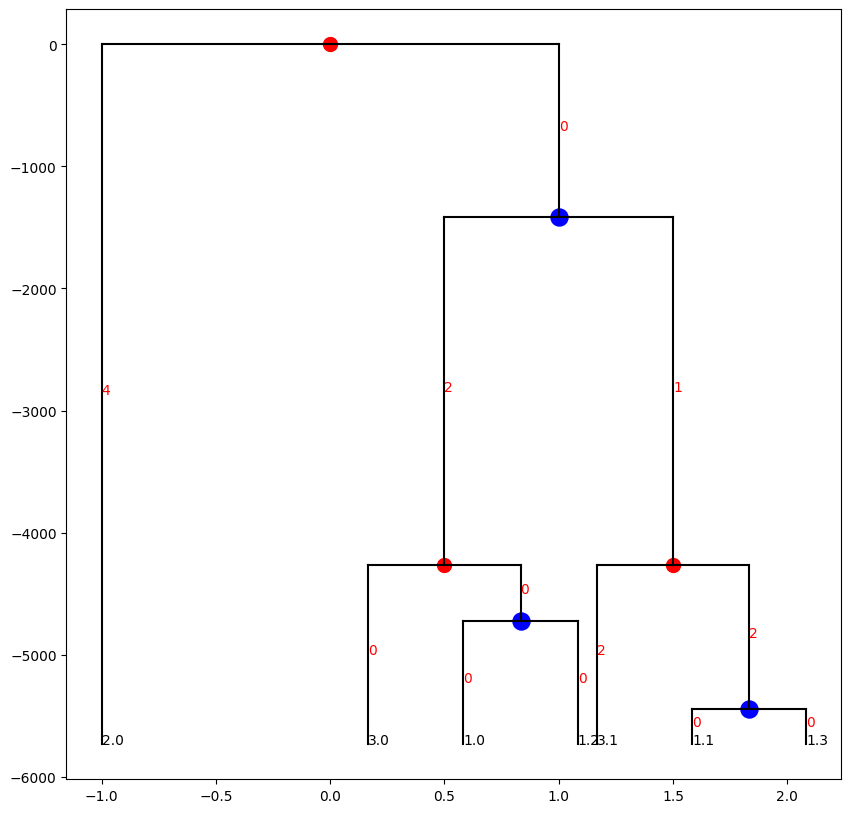

In [4]:
t = make_std_coal_tree(n,N)
#draw_png_tree(t)
make_duplications(t,d)
make_mutations(t,mu)
draw_png_tree(t)

In [5]:
genotype_matrix(t)

array([[1, 'D0', 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [1, 'D1', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0],
       [1, 'D2', 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [1, 'D3', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0],
       [2, 'D0', 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [3, 'D0', 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [3, 'D1', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]],
      dtype=object)

#### Problem

Since we start with a standard coalescence tree, we can not place duplication events before the MRCA. Furthermore, the outcome of the copy number distribution is random, since all individual lineages have negative binomial distributed number of gene copies.

## 2 Structured Coalescence

Backward in time approach

Start with a present day sample of $n$ indivudals with a given copy number distribution. With rate $d$ an "unduplication" event may happen, or with $1/N$ a coalescence event, if two individuals carry the same number of gene copies. We can also track the "path", i.e. the current gene duplication distribution along the tree.

Then, place mutations on the tree.

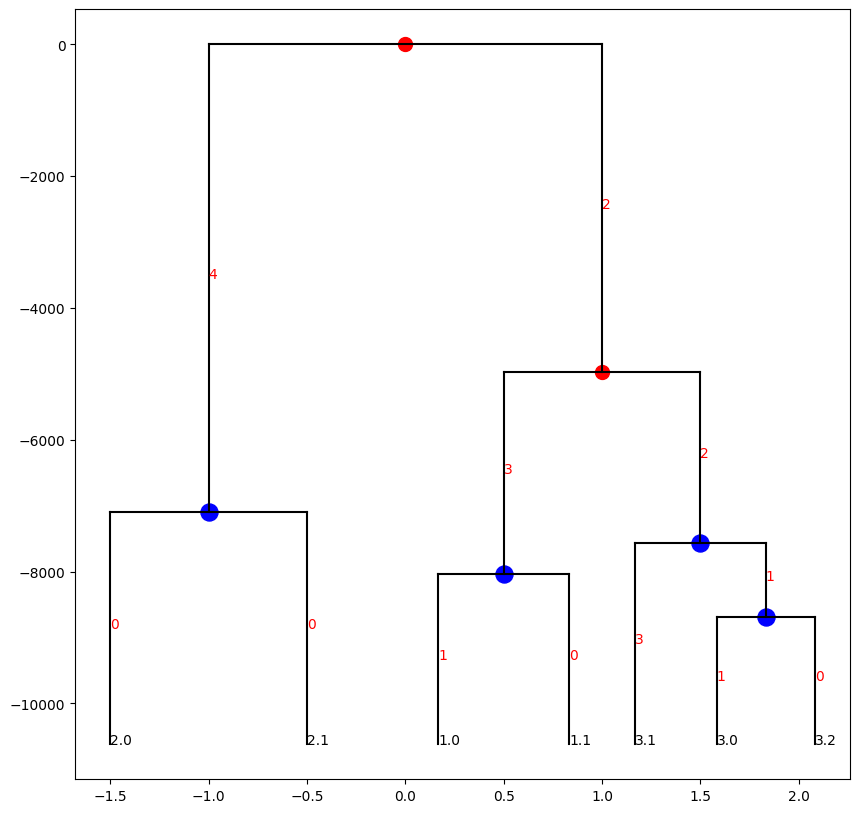

In [6]:
t, path = make_structured_coal_tree(pop,d,N)
make_mutations(t,mu)
draw_png_tree(t)

In [7]:
genotype_matrix(t)

array([[1, 'D0', 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [1, 'D1', 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [2, 'D0', 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [2, 'D1', 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [3, 'D0', 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
       [3, 'D1', 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        1.0, 1.0, 1.0, 1.0, 0.0, 0.0],
       [3, 'D2', 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        1.0, 0.0, 0.0, 0.0, 1.0, 0.0]], dtype=object)

### Problem

With the structured coalescent approach we may end up in scenarios, where one has to wait for either a duplication or coalescence rate, which increases the time. For example, if we have a high unduplication rate, all unduplication events may happen instantanously. Or, vice versa, with a very low unduplication rate one has to wait for this event and immediately coalesce afterwards.

## 3 Random Walk on graph

Forward in time approach

Again, consider a given present day copy number configuration. Trace the "path" of the gene copy number distribution $\alpha$, where $\alpha_i$ determines the number of individuals carrying $i$ many copies. With rate $c =1/N$ a split event happens, such that $$\alpha \rightarrow \alpha + 1[i].$$ With rate $d$, a copy duplicates, such that $$\alpha \rightarrow \alpha - 1[i] + 1[i+1].$$

A path in this graph corresponds to a coalescence tree. Following the path, we may either enter the present day copy number configuration (the "End"-state), or a state, from which we can no longer reach the End, which is the cemetery "Out"-state.

Conditioned on the duplication rate $d$  we can calculate the total probability to reach the End before getting out of bounce.

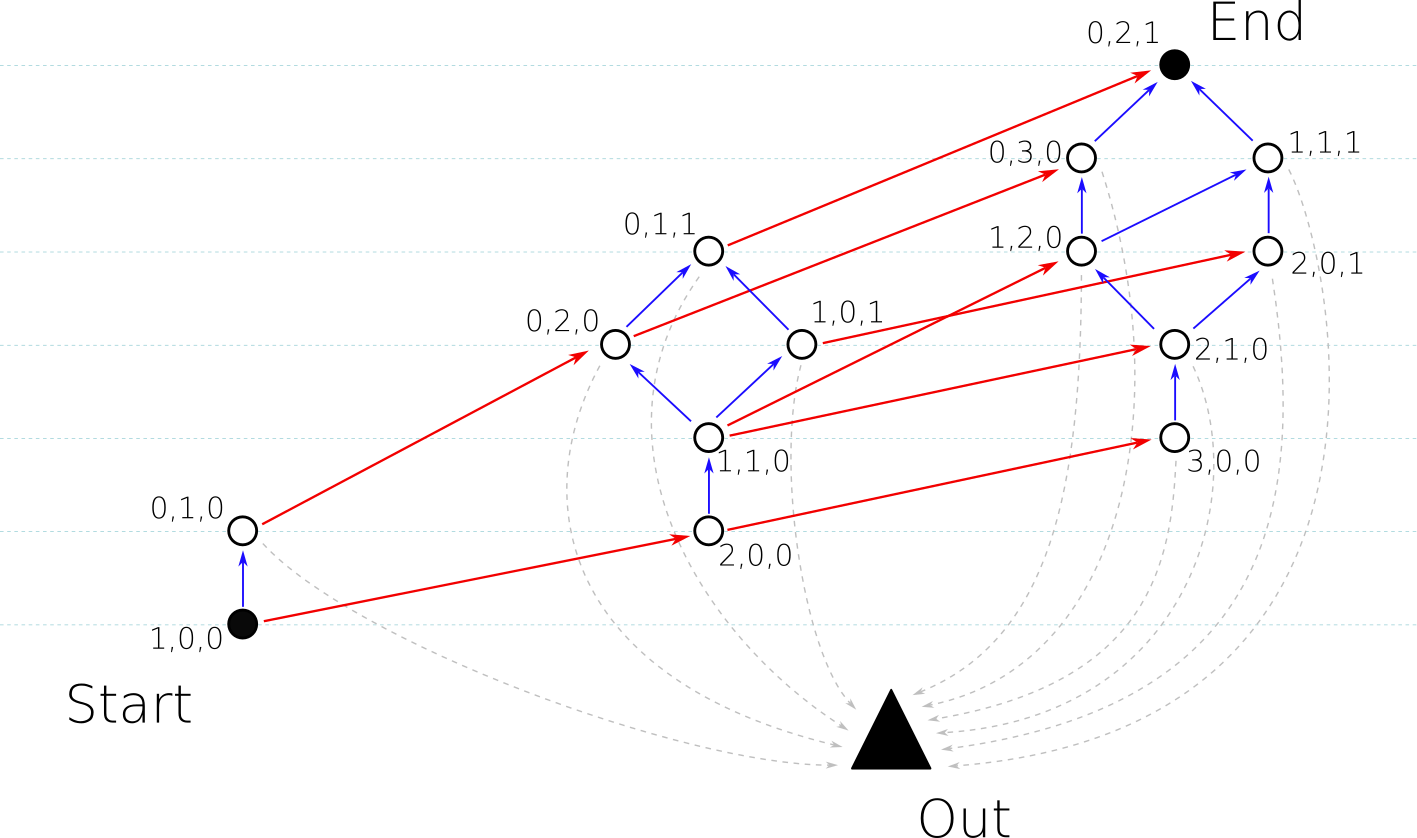

In [8]:
display(Image("Illustration_new.png", width=700))

P[End]: 0.0869047619047619


100%|██████████| 15/15 [00:00<00:00, 1136.98it/s]


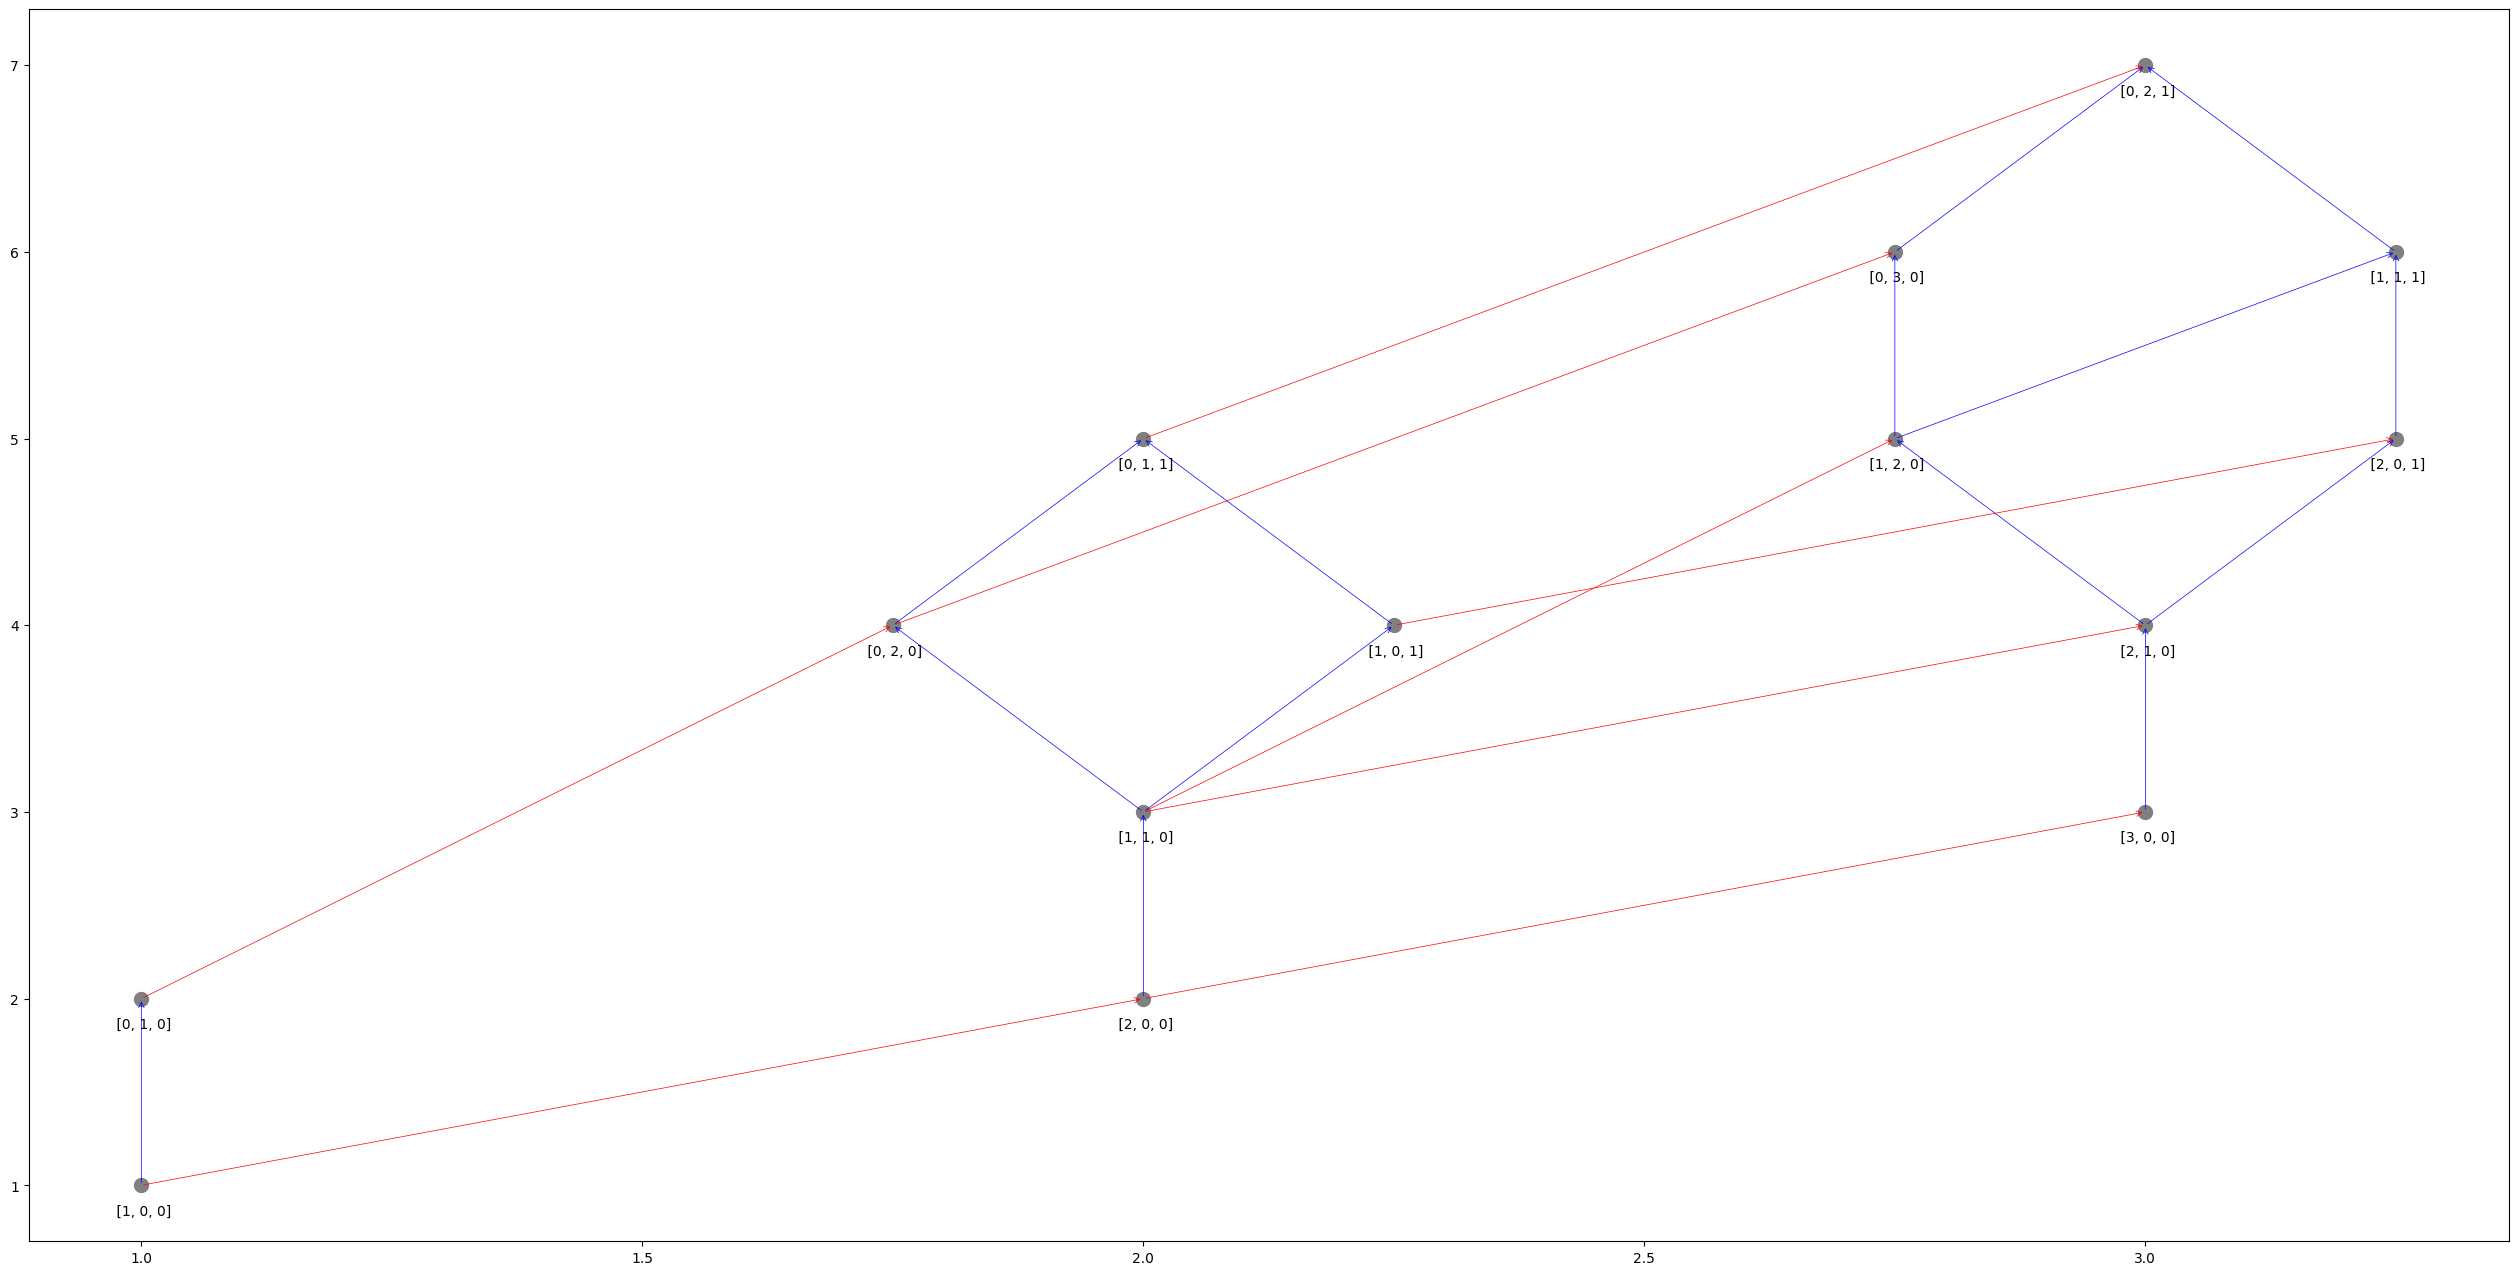

In [9]:
graph = make_graph(alpha, N, d)
print("P[End]:",success_prob(graph, alpha)[0])
draw_graph(graph)